# Model 1 
- batchsize 32, 
- 300 epoch


In [30]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf

path = r"./input"

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=32, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


Convert from RGB to Lab

In [31]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) 
print(X.shape)
print(Y.shape)

(32, 256, 256, 1)
(32, 256, 256, 2)


In [20]:
#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [21]:
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_41 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_42 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_44 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 512)      

In [22]:
model.fit(X,Y,validation_split=0.2, epochs=150, batch_size=32)

Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 0.0366 - accuracy: 0.5162 - val_loss: 1.0558 - val_accuracy: 0.4314
Epoch 2/150
1/1 [==============================] - 4s 4s/step - loss: 0.9463 - accuracy: 0.5329 - val_loss: 0.9794 - val_accuracy: 0.4234
Epoch 3/150
1/1 [==============================] - 4s 4s/step - loss: 0.9151 - accuracy: 0.5466 - val_loss: 0.0367 - val_accuracy: 0.4235
Epoch 4/150
1/1 [==============================] - 3s 3s/step - loss: 0.0291 - accuracy: 0.5466 - val_loss: 0.0213 - val_accuracy: 0.4286
Epoch 5/150
1/1 [==============================] - 3s 3s/step - loss: 0.0245 - accuracy: 0.5452 - val_loss: 0.0213 - val_accuracy: 0.4013
Epoch 6/150
1/1 [==============================] - 4s 4s/step - loss: 0.0245 - accuracy: 0.5018 - val_loss: 0.0219 - val_accuracy: 0.4405
Epoch 7/150
1/1 [==============================] - 4s 4s/step - loss: 0.0242 - accuracy: 0.5452 - val_loss: 0.0257 - val_accuracy: 0.4328
Epoch 8/150
1/1 [=================

1/1 [==============================] - 3s 3s/step - loss: 0.0233 - accuracy: 0.5488 - val_loss: 0.0224 - val_accuracy: 0.4408
Epoch 61/150
1/1 [==============================] - 3s 3s/step - loss: 0.0233 - accuracy: 0.5485 - val_loss: 0.0207 - val_accuracy: 0.4641
Epoch 62/150
1/1 [==============================] - 4s 4s/step - loss: 0.0229 - accuracy: 0.5534 - val_loss: 0.0166 - val_accuracy: 0.7526
Epoch 63/150
1/1 [==============================] - 4s 4s/step - loss: 0.0233 - accuracy: 0.5960 - val_loss: 0.0241 - val_accuracy: 0.4350
Epoch 64/150
1/1 [==============================] - 4s 4s/step - loss: 0.0236 - accuracy: 0.5467 - val_loss: 0.0177 - val_accuracy: 0.7452
Epoch 65/150
1/1 [==============================] - 3s 3s/step - loss: 0.0223 - accuracy: 0.6395 - val_loss: 0.0167 - val_accuracy: 0.7779
Epoch 66/150
1/1 [==============================] - 4s 4s/step - loss: 0.0225 - accuracy: 0.6254 - val_loss: 0.0192 - val_accuracy: 0.5631
Epoch 67/150
1/1 [======================

Epoch 119/150
1/1 [==============================] - 3s 3s/step - loss: 0.0241 - accuracy: 0.5466 - val_loss: 0.0218 - val_accuracy: 0.4234
Epoch 120/150
1/1 [==============================] - 4s 4s/step - loss: 0.0241 - accuracy: 0.5466 - val_loss: 0.0216 - val_accuracy: 0.4234
Epoch 121/150
1/1 [==============================] - 4s 4s/step - loss: 0.0241 - accuracy: 0.5466 - val_loss: 0.0206 - val_accuracy: 0.4234
Epoch 122/150
1/1 [==============================] - 4s 4s/step - loss: 0.0240 - accuracy: 0.5466 - val_loss: 0.0200 - val_accuracy: 0.4250
Epoch 123/150
1/1 [==============================] - 3s 3s/step - loss: 0.0240 - accuracy: 0.5448 - val_loss: 0.0210 - val_accuracy: 0.4251
Epoch 124/150
1/1 [==============================] - 3s 3s/step - loss: 0.0240 - accuracy: 0.5456 - val_loss: 0.0210 - val_accuracy: 0.4250
Epoch 125/150
1/1 [==============================] - 4s 4s/step - loss: 0.0239 - accuracy: 0.5449 - val_loss: 0.0215 - val_accuracy: 0.4260
Epoch 126/150
1/1 [=

# Model2

- Train batch 710
- less complex model

In [23]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )
path = r"./input"
train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=710, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


In [24]:
# X =[]
# Y =[]
# for img in train[0]:
#   try:
#       lab = rgb2lab(img)
#       X.append(lab[:,:,0]) 
#       Y.append(lab[:,:,1:] / 128) 
#   except:
#      print('error')
# X = np.array(X)
# Y = np.array(Y)
# X = X.reshape(X.shape+(1,)) 
# print(X.shape)
# print(Y.shape)

FileNotFoundError: [Errno 2] No such file or directory: './input\\archive\\55.hd-wallpaper-sunflower-field-aesthetic-ultra-nature-flowers-beautiful-landscape-summer-scenery-sunflowers-land-scene-background-blossom-skyline-real-agriculture-flora-cultivation-bluesky-yellowflowers.jpg'

In [32]:

#Encoder
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model1.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model1.add(UpSampling2D((2, 2)))

In [33]:
model1.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_61 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_62 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_63 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 conv2d_64 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 128)       295040    
                                                                 
 up_sampling2d_15 (UpSampli  (None, 64, 64, 128)      

In [34]:
model1.fit(X,Y,validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.2850 - accuracy: 0.4865 - val_loss: 0.9496 - val_accuracy: 0.5047
Epoch 2/300
1/1 [==============================] - 2s 2s/step - loss: 1.0038 - accuracy: 0.5144 - val_loss: 0.7669 - val_accuracy: 0.5073
Epoch 3/300
1/1 [==============================] - 2s 2s/step - loss: 0.7914 - accuracy: 0.5176 - val_loss: 0.9975 - val_accuracy: 0.4958
Epoch 4/300
1/1 [==============================] - 2s 2s/step - loss: 1.0226 - accuracy: 0.4877 - val_loss: 1.0018 - val_accuracy: 0.4957
Epoch 5/300
1/1 [==============================] - 2s 2s/step - loss: 1.0244 - accuracy: 0.4856 - val_loss: 1.0018 - val_accuracy: 0.4957
Epoch 6/300
1/1 [==============================] - 2s 2s/step - loss: 1.0233 - accuracy: 0.4856 - val_loss: 0.9933 - val_accuracy: 0.4957
Epoch 7/300
1/1 [==============================] - 2s 2s/step - loss: 1.0147 - accuracy: 0.4856 - val_loss: 0.9648 - val_accuracy: 0.4957
Epoch 8/300
1/1 [=================

1/1 [==============================] - 2s 2s/step - loss: 0.0216 - accuracy: 0.7012 - val_loss: 0.0232 - val_accuracy: 0.5235
Epoch 61/300
1/1 [==============================] - 2s 2s/step - loss: 0.0284 - accuracy: 0.5075 - val_loss: 0.0185 - val_accuracy: 0.5761
Epoch 62/300
1/1 [==============================] - 2s 2s/step - loss: 0.0222 - accuracy: 0.7029 - val_loss: 0.0202 - val_accuracy: 0.5237
Epoch 63/300
1/1 [==============================] - 2s 2s/step - loss: 0.0230 - accuracy: 0.6518 - val_loss: 0.0206 - val_accuracy: 0.5067
Epoch 64/300
1/1 [==============================] - 2s 2s/step - loss: 0.0236 - accuracy: 0.6206 - val_loss: 0.0205 - val_accuracy: 0.5068
Epoch 65/300
1/1 [==============================] - 2s 2s/step - loss: 0.0236 - accuracy: 0.6212 - val_loss: 0.0199 - val_accuracy: 0.5218
Epoch 66/300
1/1 [==============================] - 2s 2s/step - loss: 0.0231 - accuracy: 0.6513 - val_loss: 0.0190 - val_accuracy: 0.5722
Epoch 67/300
1/1 [======================

Epoch 119/300
1/1 [==============================] - 3s 3s/step - loss: 0.0202 - accuracy: 0.7176 - val_loss: 0.0169 - val_accuracy: 0.6264
Epoch 120/300
1/1 [==============================] - 3s 3s/step - loss: 0.0201 - accuracy: 0.7222 - val_loss: 0.0167 - val_accuracy: 0.6297
Epoch 121/300
1/1 [==============================] - 3s 3s/step - loss: 0.0202 - accuracy: 0.7250 - val_loss: 0.0171 - val_accuracy: 0.6271
Epoch 122/300
1/1 [==============================] - 2s 2s/step - loss: 0.0201 - accuracy: 0.7264 - val_loss: 0.0178 - val_accuracy: 0.6233
Epoch 123/300
1/1 [==============================] - 2s 2s/step - loss: 0.0199 - accuracy: 0.7236 - val_loss: 0.0184 - val_accuracy: 0.6197
Epoch 124/300
1/1 [==============================] - 2s 2s/step - loss: 0.0199 - accuracy: 0.7202 - val_loss: 0.0186 - val_accuracy: 0.6173
Epoch 125/300
1/1 [==============================] - 3s 3s/step - loss: 0.0199 - accuracy: 0.7181 - val_loss: 0.0183 - val_accuracy: 0.6208
Epoch 126/300
1/1 [=

1/1 [==============================] - 2s 2s/step - loss: 0.0171 - accuracy: 0.7258 - val_loss: 0.0238 - val_accuracy: 0.5961
Epoch 178/300
1/1 [==============================] - 3s 3s/step - loss: 0.0173 - accuracy: 0.7191 - val_loss: 0.0229 - val_accuracy: 0.6107
Epoch 179/300
1/1 [==============================] - 2s 2s/step - loss: 0.0169 - accuracy: 0.7282 - val_loss: 0.0212 - val_accuracy: 0.6227
Epoch 180/300
1/1 [==============================] - 3s 3s/step - loss: 0.0166 - accuracy: 0.7426 - val_loss: 0.0210 - val_accuracy: 0.6138
Epoch 181/300
1/1 [==============================] - 3s 3s/step - loss: 0.0165 - accuracy: 0.7465 - val_loss: 0.0198 - val_accuracy: 0.6256
Epoch 182/300
1/1 [==============================] - 2s 2s/step - loss: 0.0164 - accuracy: 0.7539 - val_loss: 0.0232 - val_accuracy: 0.5685
Epoch 183/300
1/1 [==============================] - 2s 2s/step - loss: 0.0167 - accuracy: 0.7114 - val_loss: 0.0194 - val_accuracy: 0.6296
Epoch 184/300
1/1 [===============

1/1 [==============================] - 3s 3s/step - loss: 0.0125 - accuracy: 0.7768 - val_loss: 0.0202 - val_accuracy: 0.6011
Epoch 236/300
1/1 [==============================] - 2s 2s/step - loss: 0.0128 - accuracy: 0.7652 - val_loss: 0.0259 - val_accuracy: 0.5602
Epoch 237/300
1/1 [==============================] - 2s 2s/step - loss: 0.0133 - accuracy: 0.7728 - val_loss: 0.0241 - val_accuracy: 0.5807
Epoch 238/300
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - accuracy: 0.7514 - val_loss: 0.0243 - val_accuracy: 0.5828
Epoch 239/300
1/1 [==============================] - 2s 2s/step - loss: 0.0126 - accuracy: 0.7726 - val_loss: 0.0220 - val_accuracy: 0.5942
Epoch 240/300
1/1 [==============================] - 2s 2s/step - loss: 0.0123 - accuracy: 0.7901 - val_loss: 0.0194 - val_accuracy: 0.6203
Epoch 241/300
1/1 [==============================] - 2s 2s/step - loss: 0.0131 - accuracy: 0.7739 - val_loss: 0.0249 - val_accuracy: 0.5619
Epoch 242/300
1/1 [===============

1/1 [==============================] - 2s 2s/step - loss: 0.0107 - accuracy: 0.8077 - val_loss: 0.0242 - val_accuracy: 0.5913
Epoch 294/300
1/1 [==============================] - 2s 2s/step - loss: 0.0105 - accuracy: 0.8068 - val_loss: 0.0252 - val_accuracy: 0.6003
Epoch 295/300
1/1 [==============================] - 2s 2s/step - loss: 0.0102 - accuracy: 0.8071 - val_loss: 0.0256 - val_accuracy: 0.6038
Epoch 296/300
1/1 [==============================] - 2s 2s/step - loss: 0.0103 - accuracy: 0.8005 - val_loss: 0.0245 - val_accuracy: 0.6131
Epoch 297/300
1/1 [==============================] - 2s 2s/step - loss: 0.0101 - accuracy: 0.8065 - val_loss: 0.0233 - val_accuracy: 0.6007
Epoch 298/300
1/1 [==============================] - 3s 3s/step - loss: 0.0099 - accuracy: 0.8139 - val_loss: 0.0213 - val_accuracy: 0.6349
Epoch 299/300
1/1 [==============================] - 2s 2s/step - loss: 0.0102 - accuracy: 0.8007 - val_loss: 0.0287 - val_accuracy: 0.5605
Epoch 300/300
1/1 [===============

# Model3
- Less complex and dropout

In [35]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=710, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


In [29]:
# X =[]
# Y =[]
# for img in train[0]:
#   lab = rgb2lab(img)
#   X.append(lab[:,:,0]) 
#   Y.append(lab[:,:,1:] / 128) 
  
# X = np.array(X)
# Y = np.array(Y)
# X = X.reshape(X.shape+(1,)) 
# print(X.shape)
# print(Y.shape)

FileNotFoundError: [Errno 2] No such file or directory: './input\\archive\\55.hd-wallpaper-sunflower-field-aesthetic-ultra-nature-flowers-beautiful-landscape-summer-scenery-sunflowers-land-scene-background-blossom-skyline-real-agriculture-flora-cultivation-bluesky-yellowflowers.jpg'

In [36]:
from keras.layers import Dropout

#Encoder
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model3.add(Dropout(0.3))
model3.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model3.add(UpSampling2D((2, 2)))

In [37]:
model3.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_69 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 dropout (Dropout)           (None, 128, 128, 128)     0         
                                                                 
 conv2d_70 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 128)       0         
                                                                 
 conv2d_71 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 conv2d_72 (Conv2D)          (None, 32, 32, 256)      

In [38]:
model3.fit(X,Y,validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
1/1 [==============================] - 6s 6s/step - loss: 0.6111 - accuracy: 0.4985 - val_loss: 0.5410 - val_accuracy: 0.5045
Epoch 2/300
1/1 [==============================] - 3s 3s/step - loss: 0.8404 - accuracy: 0.5152 - val_loss: 0.4543 - val_accuracy: 0.5043
Epoch 3/300
1/1 [==============================] - 3s 3s/step - loss: 0.6428 - accuracy: 0.5143 - val_loss: 0.0758 - val_accuracy: 0.5043
Epoch 4/300
1/1 [==============================] - 3s 3s/step - loss: 0.2045 - accuracy: 0.5144 - val_loss: 0.0212 - val_accuracy: 0.5033
Epoch 5/300
1/1 [==============================] - 3s 3s/step - loss: 0.0298 - accuracy: 0.5085 - val_loss: 0.0212 - val_accuracy: 0.4997
Epoch 6/300
1/1 [==============================] - 3s 3s/step - loss: 0.0292 - accuracy: 0.4956 - val_loss: 0.0212 - val_accuracy: 0.5023
Epoch 7/300
1/1 [==============================] - 3s 3s/step - loss: 0.0281 - accuracy: 0.4950 - val_loss: 0.0210 - val_accuracy: 0.5003
Epoch 8/300
1/1 [=================

1/1 [==============================] - 3s 3s/step - loss: 0.0228 - accuracy: 0.6713 - val_loss: 0.0198 - val_accuracy: 0.5525
Epoch 61/300
1/1 [==============================] - 3s 3s/step - loss: 0.0227 - accuracy: 0.6594 - val_loss: 0.0195 - val_accuracy: 0.5628
Epoch 62/300
1/1 [==============================] - 3s 3s/step - loss: 0.0225 - accuracy: 0.6717 - val_loss: 0.0182 - val_accuracy: 0.6054
Epoch 63/300
1/1 [==============================] - 3s 3s/step - loss: 0.0221 - accuracy: 0.7015 - val_loss: 0.0178 - val_accuracy: 0.6180
Epoch 64/300
1/1 [==============================] - 3s 3s/step - loss: 0.0221 - accuracy: 0.7076 - val_loss: 0.0186 - val_accuracy: 0.5928
Epoch 65/300
1/1 [==============================] - 3s 3s/step - loss: 0.0217 - accuracy: 0.6979 - val_loss: 0.0187 - val_accuracy: 0.5855
Epoch 66/300
1/1 [==============================] - 3s 3s/step - loss: 0.0217 - accuracy: 0.6936 - val_loss: 0.0173 - val_accuracy: 0.6170
Epoch 67/300
1/1 [======================

Epoch 119/300
1/1 [==============================] - 3s 3s/step - loss: 0.0205 - accuracy: 0.7135 - val_loss: 0.0170 - val_accuracy: 0.6254
Epoch 120/300
1/1 [==============================] - 4s 4s/step - loss: 0.0203 - accuracy: 0.7144 - val_loss: 0.0182 - val_accuracy: 0.6257
Epoch 121/300
1/1 [==============================] - 4s 4s/step - loss: 0.0203 - accuracy: 0.7092 - val_loss: 0.0182 - val_accuracy: 0.6258
Epoch 122/300
1/1 [==============================] - 3s 3s/step - loss: 0.0202 - accuracy: 0.7108 - val_loss: 0.0175 - val_accuracy: 0.6246
Epoch 123/300
1/1 [==============================] - 3s 3s/step - loss: 0.0202 - accuracy: 0.7172 - val_loss: 0.0178 - val_accuracy: 0.6275
Epoch 124/300
1/1 [==============================] - 3s 3s/step - loss: 0.0200 - accuracy: 0.7165 - val_loss: 0.0184 - val_accuracy: 0.6266
Epoch 125/300
1/1 [==============================] - 3s 3s/step - loss: 0.0200 - accuracy: 0.7078 - val_loss: 0.0183 - val_accuracy: 0.6269
Epoch 126/300
1/1 [=

1/1 [==============================] - 3s 3s/step - loss: 0.0179 - accuracy: 0.7322 - val_loss: 0.0176 - val_accuracy: 0.6391
Epoch 178/300
1/1 [==============================] - 3s 3s/step - loss: 0.0179 - accuracy: 0.7426 - val_loss: 0.0175 - val_accuracy: 0.6397
Epoch 179/300
1/1 [==============================] - 3s 3s/step - loss: 0.0178 - accuracy: 0.7435 - val_loss: 0.0187 - val_accuracy: 0.6191
Epoch 180/300
1/1 [==============================] - 3s 3s/step - loss: 0.0177 - accuracy: 0.7374 - val_loss: 0.0188 - val_accuracy: 0.6129
Epoch 181/300
1/1 [==============================] - 3s 3s/step - loss: 0.0176 - accuracy: 0.7374 - val_loss: 0.0178 - val_accuracy: 0.6312
Epoch 182/300
1/1 [==============================] - 3s 3s/step - loss: 0.0176 - accuracy: 0.7389 - val_loss: 0.0168 - val_accuracy: 0.6327
Epoch 183/300
1/1 [==============================] - 3s 3s/step - loss: 0.0177 - accuracy: 0.7374 - val_loss: 0.0206 - val_accuracy: 0.6089
Epoch 184/300
1/1 [===============

1/1 [==============================] - 3s 3s/step - loss: 0.0160 - accuracy: 0.7569 - val_loss: 0.0161 - val_accuracy: 0.6141
Epoch 236/300
1/1 [==============================] - 3s 3s/step - loss: 0.0160 - accuracy: 0.7508 - val_loss: 0.0228 - val_accuracy: 0.5937
Epoch 237/300
1/1 [==============================] - 3s 3s/step - loss: 0.0163 - accuracy: 0.7444 - val_loss: 0.0222 - val_accuracy: 0.5973
Epoch 238/300
1/1 [==============================] - 3s 3s/step - loss: 0.0167 - accuracy: 0.7387 - val_loss: 0.0219 - val_accuracy: 0.5878
Epoch 239/300
1/1 [==============================] - 3s 3s/step - loss: 0.0158 - accuracy: 0.7542 - val_loss: 0.0211 - val_accuracy: 0.5940
Epoch 240/300
1/1 [==============================] - 3s 3s/step - loss: 0.0161 - accuracy: 0.7548 - val_loss: 0.0177 - val_accuracy: 0.6163
Epoch 241/300
1/1 [==============================] - 3s 3s/step - loss: 0.0181 - accuracy: 0.6912 - val_loss: 0.0226 - val_accuracy: 0.5832
Epoch 242/300
1/1 [===============

1/1 [==============================] - 3s 3s/step - loss: 0.0138 - accuracy: 0.7723 - val_loss: 0.0211 - val_accuracy: 0.6136
Epoch 294/300
1/1 [==============================] - 3s 3s/step - loss: 0.0135 - accuracy: 0.7731 - val_loss: 0.0204 - val_accuracy: 0.6170
Epoch 295/300
1/1 [==============================] - 3s 3s/step - loss: 0.0136 - accuracy: 0.7705 - val_loss: 0.0207 - val_accuracy: 0.6120
Epoch 296/300
1/1 [==============================] - 3s 3s/step - loss: 0.0135 - accuracy: 0.7726 - val_loss: 0.0205 - val_accuracy: 0.6189
Epoch 297/300
1/1 [==============================] - 3s 3s/step - loss: 0.0135 - accuracy: 0.7770 - val_loss: 0.0210 - val_accuracy: 0.6169
Epoch 298/300
1/1 [==============================] - 3s 3s/step - loss: 0.0133 - accuracy: 0.7741 - val_loss: 0.0212 - val_accuracy: 0.6181
Epoch 299/300
1/1 [==============================] - 3s 3s/step - loss: 0.0133 - accuracy: 0.7780 - val_loss: 0.0210 - val_accuracy: 0.6215
Epoch 300/300
1/1 [===============

### Models
model
- accuracy: 0.7866 - val_accuracy: 0.7758

model1
- accuracy: 0.8432  - val_accuracy: 0.6941

model3

- accuracy: 0.8210 - val_loss: 0.0221 - val_accuracy: 0.6905



## Test result

Download test images

In [39]:
from PIL import Image
import requests
from io import BytesIO

url1 = 'https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/old-barn-in-black-and-white-randall-nyhof.jpg'

url2 = 'https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/horizontal-black-and-white-photograph-of-a-lake-michigan-sunset-randall-nyhof.jpg'

url3 = 'https://images.unsplash.com/photo-1614925861087-aa06270091b3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8OXx8YmxhY2slMjBhbmQlMjB3aGl0ZSUyMG5hdHVyZXxlbnwwfHwwfHw%3D&w=1000&q=80'

url4 = 'https://images.squarespace-cdn.com/content/538a3874e4b0ab1541d204ad/1490210210601-DDAMF95MFG8RQ7T1M56V/?content-type=image%2Fjpeg'

url_list = [url1,url2,url3,url4]

In [40]:
import matplotlib.pyplot as plt

Model 1 

1/1 [==============================] - 0s 135ms/step


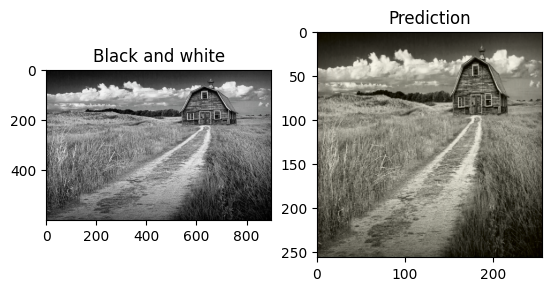

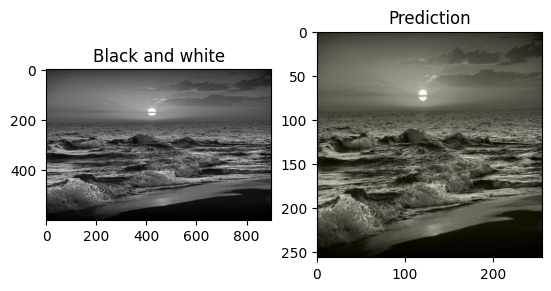

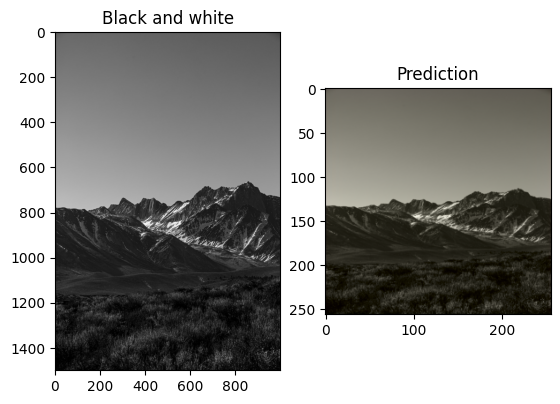

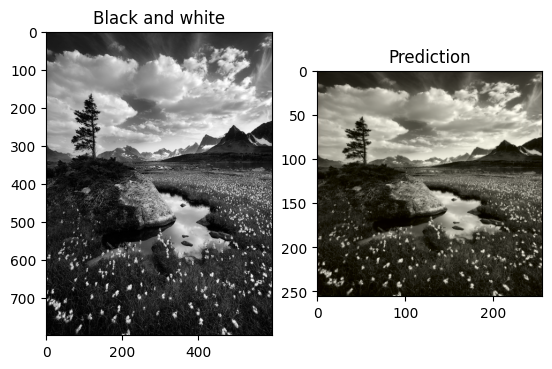

In [41]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

Model 2

1/1 [==============================] - 0s 67ms/step


C:\Users\win10\AppData\Local\Temp\ipykernel_22936\3481389523.py:24: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 3 negative Z values that have been clipped to zero
  axarr[1].imshow(lab2rgb(result))


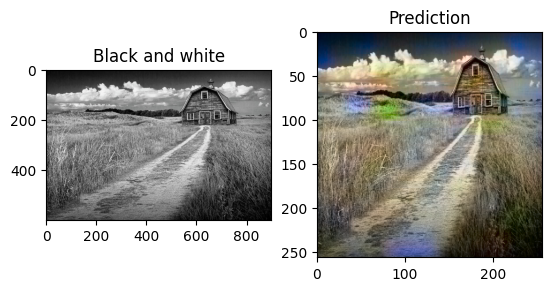

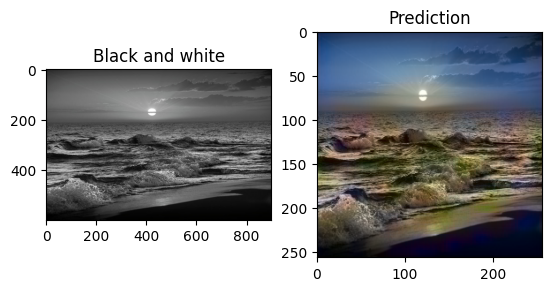

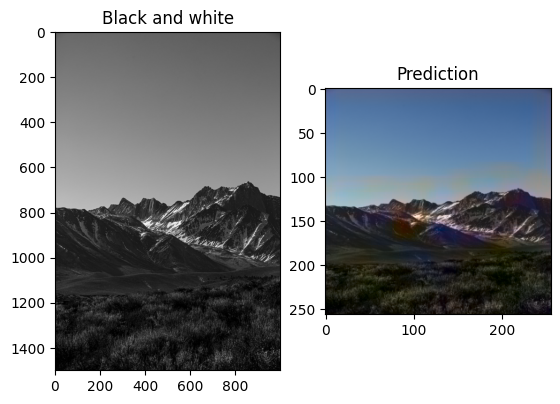

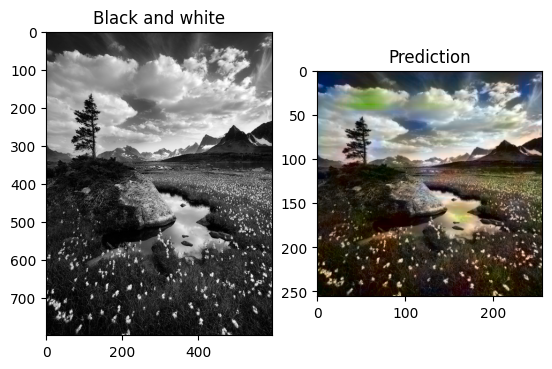

In [42]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model1.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

Model 3

1/1 [==============================] - 0s 65ms/step


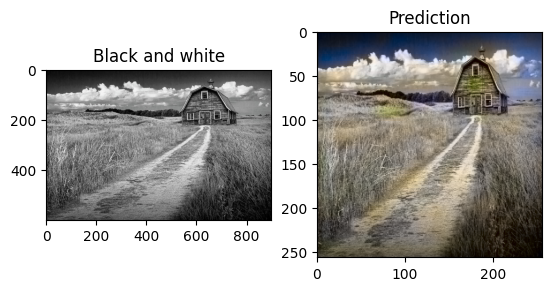

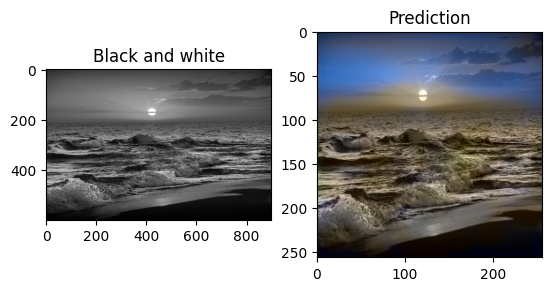

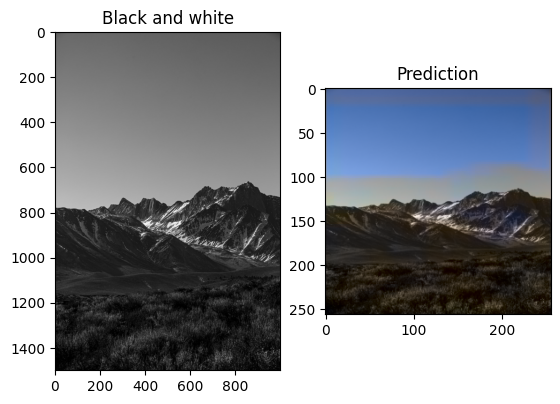

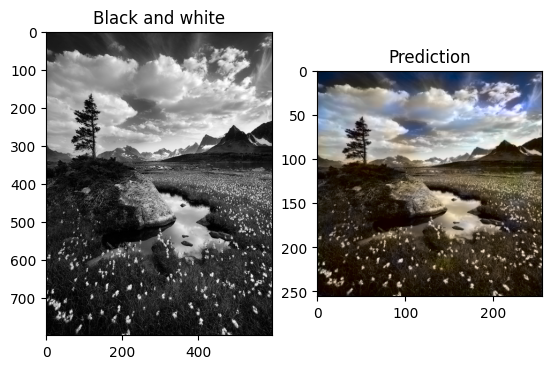

In [43]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model3.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

### Save model

In [44]:
model1.save('image-colorization.h5')

C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Load model

In [55]:
# # Adjust the number of output channels in both convolutional layers
# model.add(Conv2D(63, (3, 3), activation='relu', padding='same', groups=3))
# model.add(Conv2D(63, (3, 3), activation='relu', padding='same', groups=3))

# # Assuming you have a test set with ground truth colorized images
# test_path = r"./input"
# test_datagen = ImageDataGenerator(rescale=1. / 255)
# test = test_datagen.flow_from_directory(test_path, target_size=(256, 256), batch_size=32, class_mode=None)

# # Assuming you have trained the model
# predictions = model.predict(test[0])

# # Assuming Y_test contains the ground truth colorized images
# Y_test = []

# for img in test[0]:
#     try:
#         lab = rgb2lab(img)
#         Y_test.append(lab[:, :, 1:] / 128)
#     except:
#         print('error')

# Y_test = np.array(Y_test)

# # Continue with the evaluation code...

# # Evaluate accuracy
# mse = np.mean(np.square(predictions - Y_test))
# print(f'Mean Squared Error (MSE): {mse}')

# # Assuming you have a threshold to decide if a prediction is accurate
# threshold = 0.1  # Adjust as needed
# accurate_predictions = np.mean(np.square(predictions - Y_test)) < threshold
# accuracy = np.mean(accurate_predictions)
# print(f'Accuracy: {accuracy}')

# # Create a confusion matrix
# conf_matrix = confusion_matrix(Y_test.flatten(), predictions.flatten() < threshold)
# print('Confusion Matrix:')
# print(conf_matrix)
